<a href="https://colab.research.google.com/github/mwasalski/Data_Science_Bootcamp/blob/main/Case_study_dane_gie%C5%82dowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2023-03-03 to 2018-03-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-03,92.740,94.9400,92.6600,94.9000,55759609
2023-03-02,91.410,92.2300,90.3900,92.1300,55574820
2023-03-01,93.870,94.6800,91.5900,92.1700,52299524
2023-02-28,93.140,94.6900,92.9200,94.2300,43959290
2023-02-27,94.280,94.7800,93.1400,93.7600,47470321
...,...,...,...,...,...
2018-03-12,79.630,80.2665,79.3350,79.9195,103484220
2018-03-09,78.175,78.9470,77.9540,78.9445,90685000
2018-03-08,77.500,77.7440,77.2625,77.5930,77252300


In [4]:
df.head() #pięc pierwszych wierszy - domyślnie

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-03,92.74,94.94,92.66,94.90,55759609
2023-03-02,91.41,92.23,90.39,92.13,55574820
2023-03-01,93.87,94.68,91.59,92.17,52299524
2023-02-28,93.14,94.69,92.92,94.23,43959290
2023-02-27,94.28,94.78,93.14,93.76,47470321


In [5]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-03,92.740,94.940,92.6600,94.90,55759609
2023-03-02,91.410,92.230,90.3900,92.13,55574820
2023-03-01,93.870,94.680,91.5900,92.17,52299524
2023-02-28,93.140,94.690,92.9200,94.23,43959290
2023-02-27,94.280,94.780,93.1400,93.76,47470321
2023-02-24,93.530,94.140,92.3186,93.50,57053812
2023-02-23,96.120,96.430,93.6700,95.82,48466994
2023-02-22,95.100,97.010,94.8000,95.79,59534094
2023-02-21,95.335,95.605,94.2700,94.58,56580360


In [6]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-12,79.630,80.2665,79.3350,79.9195,103484220
2018-03-09,78.175,78.9470,77.9540,78.9445,90685000
2018-03-08,77.500,77.7440,77.2625,77.5930,77252300
2018-03-07,76.326,77.2950,76.1255,77.2500,83482460
2018-03-06,76.660,77.1065,76.4000,76.8820,91234360


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,120.834435,122.300056,119.209885,120.764731,8.509784e+07
std,34.670422,35.034803,34.256557,34.604277,3.952814e+07
min,67.300000,69.801500,65.350000,67.198000,1.762674e+07
25%,90.050000,90.845750,89.025000,89.992625,5.840360e+07
50%,108.107000,110.885500,106.348100,108.222000,7.366923e+07
75%,158.328500,159.931000,156.225000,158.093500,1.001438e+08
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.columns = [col.lower() for col in df.columns] #szybkie zamienianie nazwa kolumn

In [10]:
df

,open,high,low,close,volume
Date,,,,,
2023-03-03,92.740,94.9400,92.6600,94.9000,55759609
2023-03-02,91.410,92.2300,90.3900,92.1300,55574820
2023-03-01,93.870,94.6800,91.5900,92.1700,52299524
2023-02-28,93.140,94.6900,92.9200,94.2300,43959290
2023-02-27,94.280,94.7800,93.1400,93.7600,47470321
...,...,...,...,...,...
2018-03-12,79.630,80.2665,79.3350,79.9195,103484220
2018-03-09,78.175,78.9470,77.9540,78.9445,90685000
2018-03-08,77.500,77.7440,77.2625,77.5930,77252300


In [11]:
df= df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2023-03-03,92.740,94.940,92.6600,94.90,55759609
2023-03-02,91.410,92.230,90.3900,92.13,55574820
2023-03-01,93.870,94.680,91.5900,92.17,52299524
2023-02-28,93.140,94.690,92.9200,94.23,43959290
2023-02-27,94.280,94.780,93.1400,93.76,47470321
2023-02-24,93.530,94.140,92.3186,93.50,57053812
2023-02-23,96.120,96.430,93.6700,95.82,48466994
2023-02-22,95.100,97.010,94.8000,95.79,59534094
2023-02-21,95.335,95.605,94.2700,94.58,56580360


In [12]:
df['open'] #Series

Date
2023-03-03    92.740
2023-03-02    91.410
2023-03-01    93.870
2023-02-28    93.140
2023-02-27    94.280
2023-02-24    93.530
2023-02-23    96.120
2023-02-22    95.100
2023-02-21    95.335
2023-02-17    97.800
Name: open, dtype: float64

In [13]:
df[['open','close']] #jako DataFrame

,open,close
Date,,
2023-03-03,92.740,94.90
2023-03-02,91.410,92.13
2023-03-01,93.870,92.17
2023-02-28,93.140,94.23
2023-02-27,94.280,93.76
2023-02-24,93.530,93.50
2023-02-23,96.120,95.82
2023-02-22,95.100,95.79
2023-02-21,95.335,94.58


In [14]:
df.iloc[-3:]

,open,high,low,close,volume
Date,,,,,
2023-02-22,95.100,97.010,94.80,95.79,59534094
2023-02-21,95.335,95.605,94.27,94.58,56580360
2023-02-17,97.800,97.940,95.65,97.20,60029405


In [15]:
df.iloc[:,-3:] #najpierw ilość wierszy, później kolumny

,low,close,volume
Date,,,
2023-03-03,92.6600,94.90,55759609
2023-03-02,90.3900,92.13,55574820
2023-03-01,91.5900,92.17,52299524
2023-02-28,92.9200,94.23,43959290
2023-02-27,93.1400,93.76,47470321
2023-02-24,92.3186,93.50,57053812
2023-02-23,93.6700,95.82,48466994
2023-02-22,94.8000,95.79,59534094
2023-02-21,94.2700,94.58,56580360


In [16]:
df.loc['2023-02-28':'2023-03-02'] #niezbyt intuicyjne, do przyzwyczajenia się

,open,high,low,close,volume
Date,,,,,
2023-03-02,91.41,92.23,90.39,92.13,55574820
2023-03-01,93.87,94.68,91.59,92.17,52299524


###Obliczanie nowych kolumn

In [19]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 961 entries, 2023-03-03 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    961 non-null    float64
 1   High    961 non-null    float64
 2   Low     961 non-null    float64
 3   Close   961 non-null    float64
 4   Volume  961 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 45.0 KB


In [20]:
df.head() ##dobra praktyka sprwadzać sobie dane

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-03,34.000,34.59,33.800,34.57,14990366
2023-03-02,32.540,33.80,32.230,33.69,17976269
2023-03-01,33.430,33.58,32.890,32.99,14404671
2023-02-28,33.750,34.00,33.165,33.26,17144021
2023-02-27,33.675,33.85,33.060,33.55,19079075


In [21]:
df.describe()

,Open,High,Low,Close,Volume
count,961.000000,961.000000,961.000000,961.000000,9.610000e+02
mean,37.204769,37.972506,36.369511,37.172643,2.556197e+07
std,9.738419,9.811145,9.582995,9.675534,1.657607e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,29.840000,30.440000,29.210000,29.930000,1.574103e+07
50%,34.680000,35.250000,33.890000,34.610000,2.185281e+07
75%,44.100000,44.800000,43.310000,43.910000,3.072537e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [22]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-03,34.00,34.59,33.80,34.57,14990366
2023-03-02,32.54,33.80,32.23,33.69,17976269
2023-03-01,33.43,33.58,32.89,32.99,14404671


In [24]:
df['Average'] = (df['Open'] + df['Close']) / 2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2023-03-03,34.000,34.59,33.800,34.57,14990366,34.2850
2023-03-02,32.540,33.80,32.230,33.69,17976269,33.1150
2023-03-01,33.430,33.58,32.890,32.99,14404671,33.2100
2023-02-28,33.750,34.00,33.165,33.26,17144021,33.5050
2023-02-27,33.675,33.85,33.060,33.55,19079075,33.6125


In [32]:
 df = df.sort_index()
 df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.000,45.00,41.060,41.57,186322536,41.7850
2019-05-13,38.790,39.24,36.080,37.10,79442420,37.9450
2019-05-14,38.310,39.96,36.850,39.96,46661147,39.1350
2019-05-15,39.370,41.88,38.950,41.29,36086065,40.3300
2019-05-16,41.480,44.06,41.250,43.00,38115524,42.2400
...,...,...,...,...,...,...
2023-02-27,33.675,33.85,33.060,33.55,19079075,33.6125
2023-02-28,33.750,34.00,33.165,33.26,17144021,33.5050
2023-03-01,33.430,33.58,32.890,32.99,14404671,33.2100


In [29]:
df.Close.shift(1)

Date
2019-05-10      NaN
2019-05-13    41.57
2019-05-14    37.10
2019-05-15    39.96
2019-05-16    41.29
              ...  
2023-02-27    33.40
2023-02-28    33.55
2023-03-01    33.26
2023-03-02    32.99
2023-03-03    33.69
Name: Close, Length: 961, dtype: float64

In [31]:
df[['Close']].shift(1)

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2023-02-27,33.40
2023-02-28,33.55
2023-03-01,33.26


In [34]:
df['Close_shift'] = df.Close.shift(1)
df

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.000,45.00,41.060,41.57,186322536,41.7850,NaN
2019-05-13,38.790,39.24,36.080,37.10,79442420,37.9450,41.57
2019-05-14,38.310,39.96,36.850,39.96,46661147,39.1350,37.10
2019-05-15,39.370,41.88,38.950,41.29,36086065,40.3300,39.96
2019-05-16,41.480,44.06,41.250,43.00,38115524,42.2400,41.29
...,...,...,...,...,...,...,...
2023-02-27,33.675,33.85,33.060,33.55,19079075,33.6125,33.40
2023-02-28,33.750,34.00,33.165,33.26,17144021,33.5050,33.55
2023-03-01,33.430,33.58,32.890,32.99,14404671,33.2100,33.26


In [37]:
df['Daily_change'] = df.Close / df.Close_shift - 1
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.000,45.00,41.060,41.57,186322536,41.7850,NaN,NaN
2019-05-13,38.790,39.24,36.080,37.10,79442420,37.9450,41.57,-0.107529
2019-05-14,38.310,39.96,36.850,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.88,38.950,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.06,41.250,43.00,38115524,42.2400,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-02-27,33.675,33.85,33.060,33.55,19079075,33.6125,33.40,0.004491
2023-02-28,33.750,34.00,33.165,33.26,17144021,33.5050,33.55,-0.008644
2023-03-01,33.430,33.58,32.890,32.99,14404671,33.2100,33.26,-0.008118


In [38]:
##usuwanie kolumn
## del df['Daily_change]

In [39]:
df.Daily_change.min()

-0.21628767847699626

In [40]:
df.Daily_change.max()

0.3825910931174088

<AxesSubplot:>

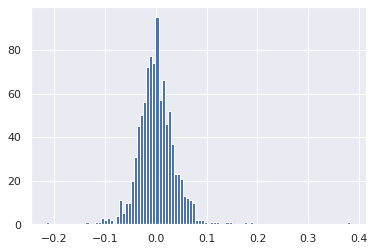

In [43]:
import seaborn as sns
sns.set()


df.Daily_change.hist(bins = 100)

<AxesSubplot:xlabel='Date'>

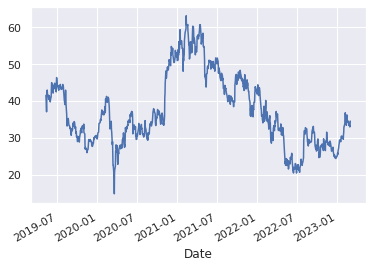

In [44]:
df.Close.plot()

###Filtrownie danych

In [46]:
df.Daily_change > 0 #tutaj dostajemy maskę logiczną

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2023-02-27     True
2023-02-28    False
2023-03-01    False
2023-03-02     True
2023-03-03     True
Name: Daily_change, Length: 961, dtype: bool

In [49]:
df_positive = df[df.Daily_change > 0]

In [50]:
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.310,39.96,36.850,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.88,38.950,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.06,41.250,43.00,38115524,42.2400,41.29,0.041414
2019-05-24,41.280,41.51,40.500,41.51,8786751,41.3950,40.47,0.025698
2019-05-31,41.150,41.57,39.410,40.41,23209848,40.7800,39.80,0.015327
...,...,...,...,...,...,...,...,...
2023-02-15,35.010,36.24,34.715,36.23,31492167,35.6200,35.23,0.028385
2023-02-22,34.350,35.17,34.220,34.54,23294036,34.4450,34.20,0.009942
2023-02-27,33.675,33.85,33.060,33.55,19079075,33.6125,33.40,0.004491


In [54]:
df_positive.Daily_change.mean()

0.02795208683970213

In [55]:
df_negative = df[df.Daily_change < 0]

In [56]:
df_negative.Daily_change.mean()

-0.025219423605478825

In [57]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2023-02-27    False
2023-02-28    False
2023-03-01    False
2023-03-02    False
2023-03-03    False
Length: 961, dtype: bool

In [58]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [59]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894


In [60]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [62]:
df[df.index > '2020-12-31']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2021-01-04,52.220,52.32,49.635,51.14,17291804,51.6800,51.00,0.002745
2021-01-05,51.000,54.19,50.760,54.01,21403169,52.5050,51.14,0.056120
2021-01-06,53.310,54.07,52.000,52.48,17738115,52.8950,54.01,-0.028328
2021-01-07,53.370,56.25,53.200,56.13,23737543,54.7500,52.48,0.069550
2021-01-08,54.395,54.79,52.580,53.28,37999442,53.8375,56.13,-0.050775
...,...,...,...,...,...,...,...,...
2023-02-27,33.675,33.85,33.060,33.55,19079075,33.6125,33.40,0.004491
2023-02-28,33.750,34.00,33.165,33.26,17144021,33.5050,33.55,-0.008644
2023-03-01,33.430,33.58,32.890,32.99,14404671,33.2100,33.26,-0.008118


In [64]:
df[(df.index >= '2020-12-31') & (df.index <= '2021-01-31')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2020-12-31,53.280,53.2800,51.0000,51.00,13282786,52.1400,53.15,-0.040452
2021-01-04,52.220,52.3200,49.6350,51.14,17291804,51.6800,51.00,0.002745
2021-01-05,51.000,54.1900,50.7600,54.01,21403169,52.5050,51.14,0.056120
2021-01-06,53.310,54.0700,52.0000,52.48,17738115,52.8950,54.01,-0.028328
2021-01-07,53.370,56.2500,53.2000,56.13,23737543,54.7500,52.48,0.069550
2021-01-08,54.395,54.7900,52.5800,53.28,37999442,53.8375,56.13,-0.050775
2021-01-11,53.110,55.0000,52.9900,54.59,23213840,53.8500,53.28,0.024587
2021-01-12,55.500,59.3900,55.0000,58.54,52151405,57.0200,54.59,0.072358
2021-01-13,58.540,59.8800,57.5300,59.40,24178501,58.9700,58.54,0.014691


In [66]:
df[(df.index == '2020-12-31') | (df.index == '2021-01-31')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2020-12-31,53.28,53.28,51.0,51.0,13282786,52.14,53.15,-0.040452


In [68]:
##wycianie dla danego miesiąca

df.index.month == 5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [69]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-05-24,23.69,23.740,21.410,21.55,40726064,22.620,23.78,-0.093776
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,21.55,0.022738
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,22.04,0.048094


In [70]:
df[df.index.year == 2019]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2019-12-24,30.33,30.84,30.11,30.44,12938593,30.385,30.33,0.003627
2019-12-26,30.47,30.79,30.03,30.67,22224500,30.570,30.44,0.007556
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303


In [72]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-0.045494
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-0.019696
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-0.043321
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
